In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Populations', 'Profit'])
data.head()

,Populations,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


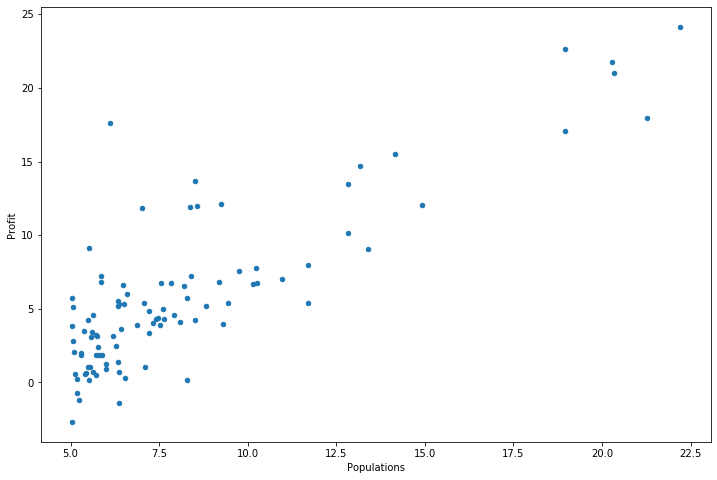

In [3]:
data.plot(kind='scatter', x='Populations', y='Profit', figsize=(12,8))
plt.show()

In [4]:
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

In [5]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Populations,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
Y = data.iloc[:, cols - 1:cols]

In [7]:
X.head()

,Ones,Populations
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
Y.head()


,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = np.asmatrix(X.values)
Y = np.asmatrix(Y.values)
theta = np.asmatrix([0, 0])

In [10]:
X.shape

(97, 2)

In [11]:
Y.shape

(97, 1)

In [12]:
theta.shape

(1, 2)

In [13]:
def error_function(theta, X, Y):
    diff = np.dot(X, np.transpose(theta)) - Y
    return (1./2 * len(X)) * np.dot(np.transpose(diff), diff)

In [14]:
def gradient_function(theta, X, Y):
	diff = np.dot(X, np.transpose(theta)) - Y
	return (1./len(X)) * np.dot(np.transpose(diff), X)

In [15]:
def gradient_descent(X, Y, theta, alpha, iter):
    gradient = gradient_function(theta, X, Y)
    cost = [np.sum(error_function(theta, X, Y))]
    
    for i in range(iter):
        theta = theta - alpha * gradient
        cost.append(np.sum(error_function(theta, X, Y)))
        gradient = gradient_function(theta, X, Y)
        
    return theta, cost

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.asmatrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [17]:
def gradient(theta, X, y):
    m = X.shape[0]
    inner = (X @ theta.T - y).T @ X  # (m,n).T @ (m, 1) -> (n, 1)，X @ theta等价于X.dot(theta)

    return inner / m

In [18]:
def lr_cost(theta, X, y):
#     """
#     X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0]#m为样本数

    inner = X @ theta.T - y  # R(m*1)，X @ theta等价于X.dot(theta)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost


In [19]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
#   拟合线性回归，返回参数和代价
#     epoch: 批处理的轮数
#     """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()  # 拷贝一份，不和原来的theta混淆

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))

    return _theta, cost_data


In [20]:
def normal_equation(X, y):
    return np.linalg.inv((X.T @ X)) * X.T * y

In [21]:
alpha = 0.01
iters = 1000

In [22]:
g, cost = gradient_descent(X, Y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [23]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
Y = data.iloc[:, cols - 1:cols]
X = np.asmatrix(X.values)
Y = np.asmatrix(Y.values)
theta = np.asmatrix([0, 0])

In [24]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [25]:
def compute_diff(t1, t2, X, y):
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    Z = np.zeros(shape=(len(t1), len(t2)))
    for i in range(len(t1)):
        for j in range(len(t2)):
            Z[i][j] = np.sum(error_function(np.asmatrix([t1[i], t2[j]]), X, y))
    
    return Z

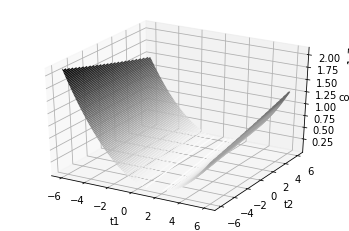

In [26]:
t1 = np.linspace(-6, 6, 30)
t2 = np.linspace(-6, 6, 30)

x = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
Z = compute_diff(t1, t2, x, y)
T1, T2 = np.meshgrid(t1, t2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(T1, T2, Z, 100, cmap='binary')
ax.set_xlabel('t1')
ax.set_ylabel('t2')
ax.set_zlabel('cost');

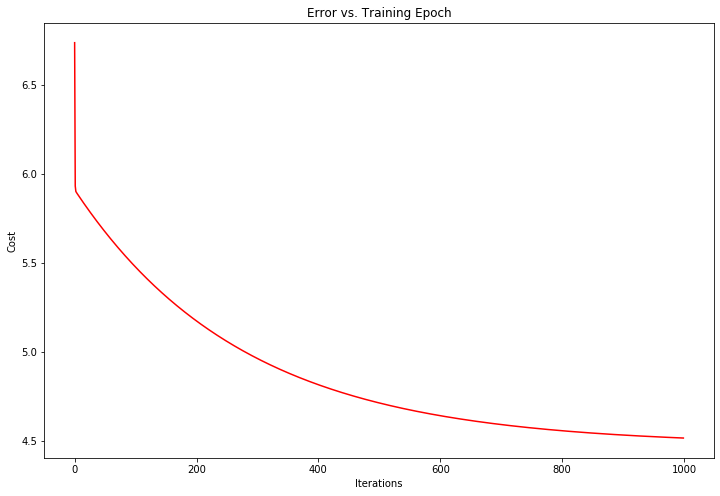

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [28]:
theta = normal_equation(X, Y)
theta

matrix([[-3.89578088],
        [ 1.19303364]])

In [29]:
path =  'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['square', 'bedrooms', 'price'])
data = (data - data.mean()) / data.std()
data.insert(0, 'Ones', 1)
data.head()

,Ones,square,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [30]:
cols = data.shape[1]
X = data.iloc[:, 0: cols - 1]
Y = data.iloc[:, cols - 1: cols]

In [31]:
X = np.asmatrix(X)
X.shape


(47, 3)

In [32]:
Y = np.asmatrix(Y)
Y.shape

(47, 1)

In [33]:
theta = np.zeros(X.shape[1])
theta = np.asmatrix(theta)
epoch = 1000
alpha = 0.01

In [34]:
final_theta, cost = gradient_descent(X, Y, theta, alpha, epoch)
final_theta


matrix([[-1.10662071e-16,  8.78503652e-01, -4.69166570e-02]])

In [35]:
theta = np.zeros(X.shape[1])
theta = np.asmatrix(theta)


In [36]:
final_theta, cost = batch_gradient_decent(theta, X, Y, epoch, alpha=alpha)
final_theta

matrix([[-1.10721125e-16,  8.78503652e-01, -4.69166570e-02]])

In [37]:
final_theta, cost = gradientDescent(X, Y, theta, alpha, epoch)
final_theta

matrix([[-1.10910099e-16,  8.78503652e-01, -4.69166570e-02]])

In [38]:
theta = np.zeros(X.shape[1])
theta = np.asmatrix(theta)

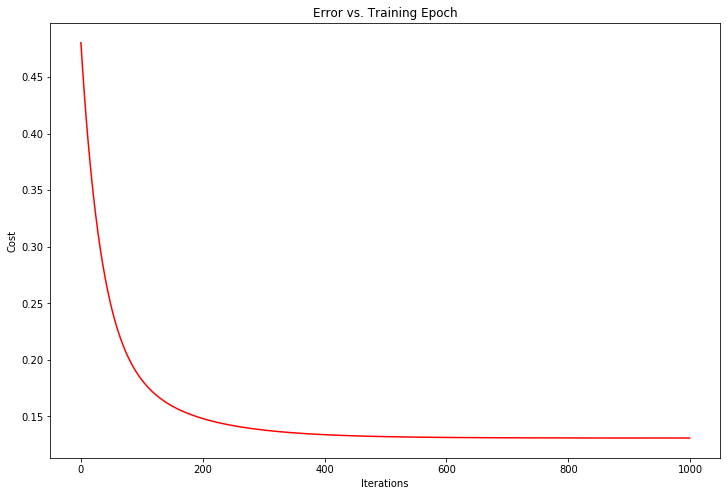

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [40]:
theta = normal_equation(X, Y)
theta

matrix([[-1.11022302e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])